In [1]:
import pandas as pd
import re
from metar import Metar
import numpy as np
import os 
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy import spatial
import seaborn as sns
import datetime
sns.set(font_scale=2)
%matplotlib inline



In [2]:
source = "source_disk/METAR/"
outsource = "../Thesis_source/MasterThesis/Figures/"
stations_info = pd.read_csv(source+"metar_stations_offshore_and_coast.txt",delimiter=";",index_col=0)
METAR_code = {}

for i,row in stations_info.iterrows():
        METAR_code[row[0]] = {}

In [3]:
stations = []
for wmo,station in stations_info.iterrows():
    name = station[0]
    stations.append(name)
    

In [4]:
offshore = ["ENDR","ENQC","ENUG","ENSL","ENNE","ENHE","ENGC","ENQA","ENHM","ENLE"]

for name in stations:
    if name in offshore:
        stations.remove(name)


In [5]:
analysis = pd.read_csv("source/analysis_dataset_new.csv")
cases = pd.read_csv("source/dataset_new.csv")
N = 0
S = 0
H = 0
Hn = 0
FW = 0
FWn = 0
for DS in [cases,analysis]:
    for i, row in DS.iterrows():
        if row[2] in stations:
            date = row[0]
            hour = row[1]
                
            time = pd.to_datetime("%i%2.2i"%(date,hour), format='%Y%m%d%H')
            ds = dict_of_dsT[row[2]]
            try:
                value = ds.iloc[ds.index.get_loc(time, method='nearest',tolerance=datetime.timedelta(hours=1))]
            except KeyError:
                continue
            month = int(str(date)[4:6])
            if  month > 4 and month < 10:
                S+=value
                N+=1
                continue
            if row[-1] == "H":
                H += value
                Hn +=1
            else: 
                FW += value
                FWn +=1
S=S/N
FW = FW/FWn
H = H/Hn

NameError: name 'dict_of_dsT' is not defined

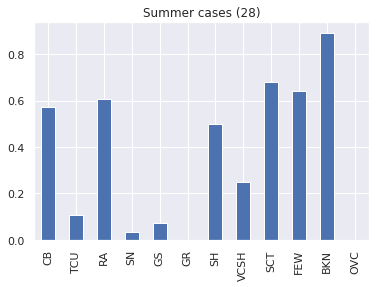

In [164]:
S.plot(kind="bar",title=f"Summer cases ({N})")

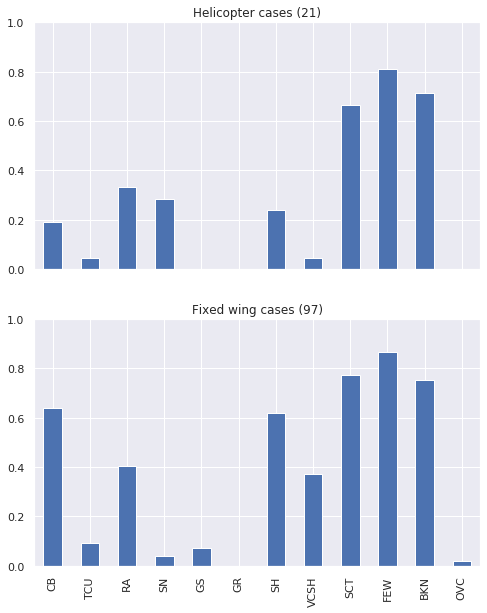

In [162]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(8,10),sharex=True)
H.plot(kind="bar",title=f"Helicopter cases ({Hn})",ylim=[0,1],ax=ax1)
FW.plot(kind="bar",title=f"Fixed wing cases ({FWn})",ylim=[0,1],ax=ax2)
fig.savefig(outsource+"METARcases.pdf")

In [158]:
observasjon =          ["CB","TCU","RA","SN","GS","GR","SH","VCSH","SCT","FEW","BKN","OVC"]
matrise =     np.array([0   ,0    ,0   ,0   ,0     ,0   ,0    ,0    ,0    ,0    ,0   ,0   ],dtype=bool)
def save_METAR(name):
    ds = pd.DataFrame.from_dict(METAR_code[name],orient="index",columns=observasjon)
    ds.index.name = "Datetime"
    ds = ds.sort_index()
    ds.to_csv("source_disk/METAR/T%s.csv"%name)

METAR_code = {}

for i,row in stations_info.iterrows():
        METAR_code[row[0]] = {}

for year in range(2008,2020):
    file = source+"METAR"+str(year)+".txt"
    with open(file) as infile:
        for line in infile.readlines():
            if "AUTO" in line:
                continue
                
            # Reset matrix

            matrise = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=bool)
            date = line.split()[0]
            month = int(date.split("-")[1])
            
            M = Metar.Metar(" ".join(line.split()[1:]),strict=0,year=year,month=month)
            
            line = line.split("TEMPO")[0]
            name = M.station_id

            for i, obs in enumerate(observasjon):
                if obs in line:
                    matrise[i] = True
                    
            METAR_code[name][date] = matrise

file = source+"ENGMMETAR.txt"
with open(file) as infile:
    for line in infile.readlines():
        if "AUTO" in line:
            continue
        # Reset matrix
        matrise = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=bool)
        date = line.split()[0]
        month = int(date.split("-")[1])
        if month > 5 and month < 9:
            continue

        line = line.split("TEMPO")[0]

        for i, obs in enumerate(observasjon):
            if obs in line:
                matrise[i] = True

        METAR_code["ENGM"][date] = matrise
            
            
for name in METAR_code:
    save_METAR(name)
    

In [58]:
observasjon =          ["CB","TCU","RA","SN","GS","GR","SH","VCSH","SCT","FEW","BKN","OVC"]
matrise =     np.array([0   ,0    ,0   ,0   ,0     ,0   ,0    ,0    ,0    ,0    ,0   ,0   ],dtype=bool)
def save_METAR(name):
    ds = pd.DataFrame.from_dict(METAR_code[name],orient="index",columns=observasjon)
    ds.index.name = "Datetime"
    ds = ds.sort_index()
    ds.to_csv("source_disk/METAR/%s.csv"%name)

METAR_code = {}

for i,row in stations_info.iterrows():
        METAR_code[row[0]] = {}

for year in range(2008,2020):
    file = source+"METAR"+str(year)+".txt"
    with open(file) as infile:
        for line in infile.readlines():
            if "AUTO" in line:
                continue
                
            # Reset matrix

            matrise = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=bool)
            date = line.split()[0]
            month = int(date.split("-")[1])
            
            if month > 5 and month < 9:
                continue
            M = Metar.Metar(" ".join(line.split()[1:]),strict=0,year=year,month=month)
            
            line = line.split("TEMPO")[0]
            name = M.station_id

            for i, obs in enumerate(observasjon):
                if obs in line:
                    matrise[i] = True
                    
            METAR_code[name][date] = matrise

file = source+"ENGMMETAR.txt"
with open(file) as infile:
    for line in infile.readlines():
        if "AUTO" in line:
            continue
        # Reset matrix
        matrise = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=bool)
        date = line.split()[0]
        month = int(date.split("-")[1])
        if month > 5 and month < 9:
            continue

        line = line.split("TEMPO")[0]

        for i, obs in enumerate(observasjon):
            if obs in line:
                matrise[i] = True

        METAR_code["ENGM"][date] = matrise
            
            
for name in METAR_code:
    save_METAR(name)
    

/home/johannestl/anaconda3/envs/Master/lib/python3.7/site-packages/metar/Metar.py:435: RuntimeWarning: _handleWind failed while processing '10012KT 040V860 5000 -RASN FEW003 SCT008 BKN010 01/M00 Q0981 '
	direction must be 0..360: '860.0'
  warnings.warn(message, RuntimeWarning)
/home/johannestl/anaconda3/envs/Master/lib/python3.7/site-packages/metar/Metar.py:435: RuntimeWarning: _handleWind failed while processing '38006KT 9999 FEW020TCU SCT045 14/08 Q1007 '
	direction must be 0..360: '380.0'
  warnings.warn(message, RuntimeWarning)
/home/johannestl/anaconda3/envs/Master/lib/python3.7/site-packages/metar/Metar.py:435: RuntimeWarning: _handleWind failed while processing '98912KT CAVOK 05/M04 Q1022 '
	direction must be 0..360: '989.0'
  warnings.warn(message, RuntimeWarning)
/home/johannestl/anaconda3/envs/Master/lib/python3.7/site-packages/metar/Metar.py:435: RuntimeWarning: _handleWind failed while processing '26006KT 210V380 CAVOK M00/M04 Q1021 RMK WIND AT 1254FT 16017KT '
	direction 

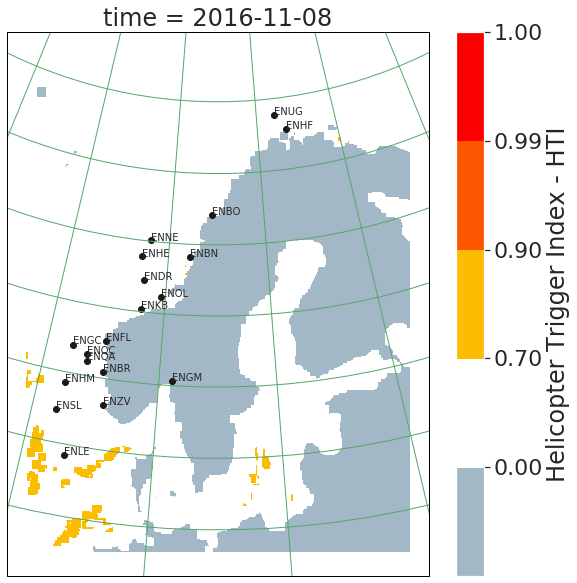

In [6]:
def plot_HTI(da):
    da.plot.pcolormesh(levels=[0,0.00000001,0.7,0.90,0.99,1],vmax=1,ax=ax, x='longitude', y='latitude',transform=ccrs.PlateCarree(),
              colors=["#a3b8c7","#ffffff", "#fcbd00", "#fc5600", "#fc0000"],
              cbar_kwargs = {
                  "ticks" : [0.000001,0.7,0.9,0.99,1],"label" : "Helicopter Trigger Index - HTI"}
             );
    return ax

folder = "source_disk/MEPS/forecasted_HTI_MEPS/"
htiseason = []
htiseason_fixed = []
for file in sorted(os.listdir(folder))[1:]:
    month = int(file[8:10])
    if month < 5 or month > 9:
        if "fixed" in file:
            htiseason_fixed.append(file)
        else:
            htiseason.append(file)

coords_list = []
for i,row in stations_info.iterrows():
    lon,lat = row[1:3].values
    coords_list.append([lon,lat])

projection = ccrs.LambertConformal(central_latitude=63,central_longitude=15,standard_parallels=[63,63],cutoff=-30)
import shapely.geometry as sgeom
list_of_geoms = []
for lon,lat in coords_list:
    point = sgeom.Point(lon,lat)
    Point = projection.project_geometry(point)
    list_of_geoms.append(Point)
    


plt.figure(figsize = [10,10])

HTI = xr.open_dataset(folder+htiseason[0]).isel(time=0)
ax = plt.subplot(projection=projection)
ax = plot_HTI(HTI["helicopter_triggered_index"])
ax.gridlines(color="g")

for i,Point in enumerate(list_of_geoms):
    name = stations_info["ICAO_ID"].iloc[i]
    point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
    point_ds.plot.scatter("x","y",color='k',ax=ax)
    ax.text(Point.x,Point.y,name)
    
   

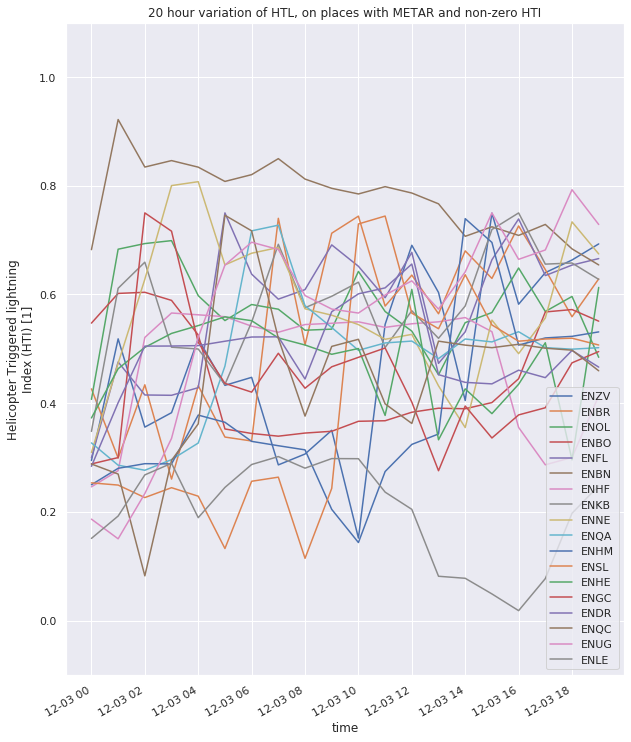

In [159]:
plt.figure(figsize=(10,12))

HTI = xr.open_dataset(folder+htiseason[100])["helicopter_triggered_index"]
dict_of_ds = {}
dict_of_dsT = {}
dict_of_points = {}
list_of_names = []
list_of_new_geoms = []
for i,Point in enumerate(list_of_geoms):
    name = stations_info["ICAO_ID"].iloc[i]
    ds = pd.read_csv(f"source_disk/METAR/{name}.csv",index_col=0,parse_dates=True)
    dict_of_ds[name] = ds
    dsT = pd.read_csv(f"source_disk/METAR/T{name}.csv",index_col=0,parse_dates=True)
    dict_of_dsT[name] = dsT
    if not name in ["ENGM"]:
        list_of_names.append(name)
        list_of_new_geoms.append(Point)
        point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
        point_ds.plot(label=name)
    dict_of_points[name] = Point
plt.ylim(-0.1,1.1)
plt.title("20 hour variation of HTL, on places with METAR and non-zero HTI")
plt.legend()

In [78]:
import datetime

white  = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=int)
yellow = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=int)
orange = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=int)
red    = np.array([0,0,0,0,0,0,0,0,0,0,0,0],dtype=int)
total  = np.array([0,0,0,0],dtype=int)

array_dict = {}
array_dict_fixed = {}

y_treshold = 0.7; o_treshold = 0.9; r_treshold = 0.99
for name in list_of_names:
    array_dict[name] = [white.copy(),yellow.copy(),orange.copy(),red.copy(),total.copy()]
    array_dict_fixed[name] = [white.copy(),yellow.copy(),orange.copy(),red.copy(),total.copy()]
    
for file in htiseason:
    HTI = xr.open_dataset(folder+file)["helicopter_triggered_index"]
    
    for name,Point in zip(list_of_names,list_of_new_geoms):
        white,yellow,orange,red,total = array_dict[name]
        
        point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
        for time in point_ds.time.values[4:10]:
            
            ds = dict_of_ds[name]
            try:
                value = ds.iloc[ds.index.get_loc(time, method='nearest',tolerance=datetime.timedelta(hours=1))]
            except KeyError:
                continue
            
            if point_ds.sel(time=time).values < y_treshold:
                white += value
                total[0] += 1
            elif point_ds.sel(time=time).values < o_treshold:
                total[1] += 1
                yellow += value
            elif point_ds.sel(time=time).values < r_treshold:
                total[2] += 1
                orange += value
            else:
                total[3] += 1
                red += value
                
for file in htiseason_fixed:
    HTI = xr.open_dataset(folder+file)["helicopter_triggered_index"]
    
    for name,Point in zip(list_of_names,list_of_new_geoms):
        white,yellow,orange,red,total = array_dict_fixed[name]
        
        point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
        for time in point_ds.time.values:
            
            ds = dict_of_ds[name]
            try:
                value = ds.iloc[ds.index.get_loc(time, method='nearest',tolerance=datetime.timedelta(hours=1))]
            except KeyError:
                continue
            
            if point_ds.sel(time=time).values < y_treshold:
                white += value
                total[0] += 1
            elif point_ds.sel(time=time).values < o_treshold:
                total[1] += 1
                yellow += value
            elif point_ds.sel(time=time).values < r_treshold:
                total[2] += 1
                orange += value
            else:
                total[3] += 1
                red += value
                       
ds = pd.DataFrame.from_dict(array_dict,orient="index",columns = ["White","Yellow","Orange","Red","Total"])
ds_fixed = pd.DataFrame.from_dict(array_dict_fixed,orient="index",columns = ["White","Yellow","Orange","Red","Total"])
ds_fixed.to_csv("source_disk/results/METAR_fixed.csv")
ds.to_csv("source_disk/results/METAR.csv")       

In [13]:
dict_of_observation_list= {}
for name in list_of_names:
    dict_of_observation_list[name] = {key : [] for key in observasjon}
    
for file in htiseason:
    ds = xr.open_dataset(folder+file)["helicopter_triggered_index"].isel(time=range(4,10))
    start,end = ds.time.values[0], ds.time.values[-1] 
    for name in dict_of_ds:
        metar = dict_of_ds[name]
        point = dict_of_points[name]
        part = ds.sel(x=point.x,y=point.y,method="nearest")
        
        if name != "ENGM":
            for time in metar.loc[start:end].index:
                tpart = part.sel(time = time,method="nearest")
                for i,obs in enumerate(metar.loc[time]):
                    if obs:
                        dict_of_observation_list[name][observasjon[i]].append(tpart.values*1)
                
#for key in dict_of_observation_list:
#    pd.DataFrame.from_dict(dict_of_observation_list[key],orient="index").to_csv("source_disk/results/HTIobs%s"%key)


In [14]:
dict_of_observation_list_F= {}
for name in list_of_names:
    dict_of_observation_list_F[name] = {key : [] for key in observasjon}
    
for file in htiseason_fixed:
    ds = xr.open_dataset(folder+file)["helicopter_triggered_index"]
    start,end = ds.time.values[0], ds.time.values[-1] 
    for name in dict_of_ds:
        metar = dict_of_ds[name]
        point = dict_of_points[name]
        part = ds.sel(x=point.x,y=point.y,method="nearest")
        
        if name != "ENGM":
            for time in metar.loc[start:end].index:
                tpart = part.sel(time = time,method="nearest")
                for i,obs in enumerate(metar.loc[time]):
                    if obs:
                        dict_of_observation_list_F[name][observasjon[i]].append(tpart.values*1)
                
#for key in dict_of_observation_list:
#    pd.DataFrame.from_dict(dict_of_observation_list[key],orient="index").to_csv("source_disk/results/HTIfixedobs%s"%key)

    

In [26]:
df1 = pd.DataFrame.from_dict(dict_of_observation_list)
df1.loc["GR"] = (df1.loc["GR"]  + df1.loc["GS"])
df1 = df1.drop("GS")
df2 = pd.DataFrame.from_dict(dict_of_observation_list_F)
df2.loc["GR"] = (df2.loc["GR"]  + df2.loc["GS"])
df2 = df2.drop("GS")


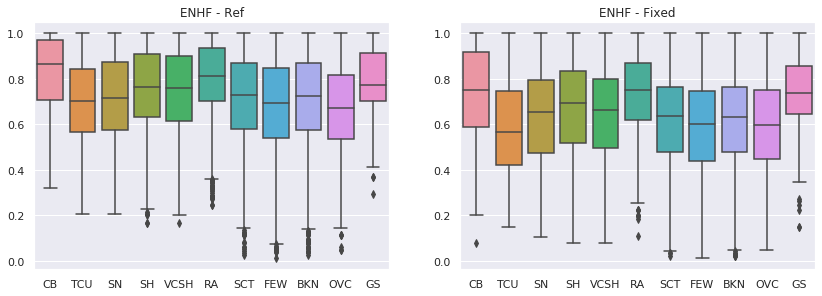

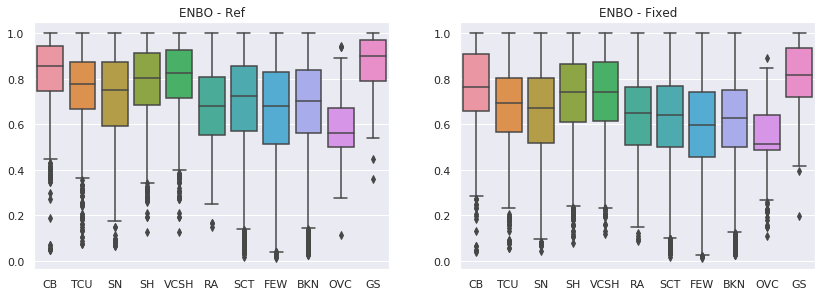

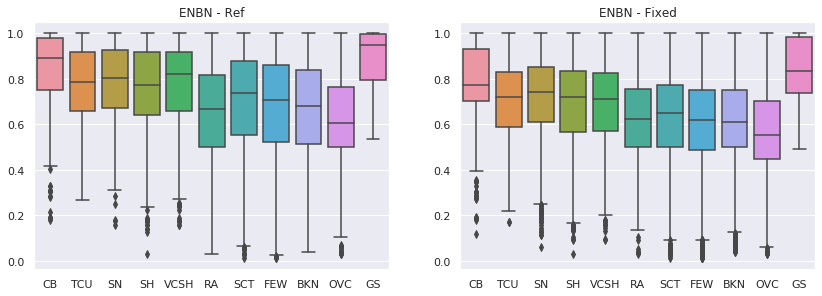

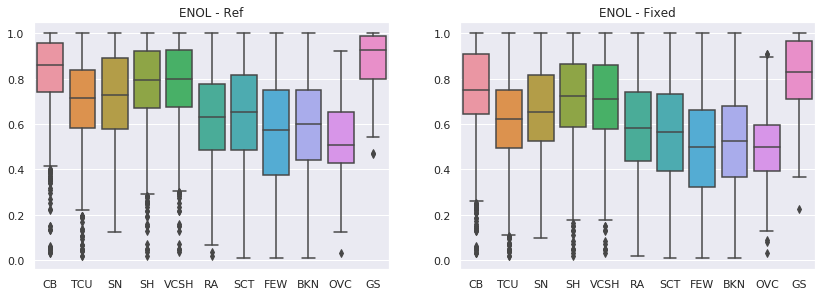

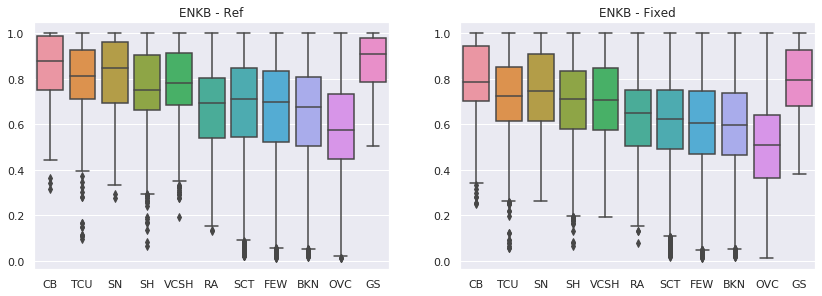

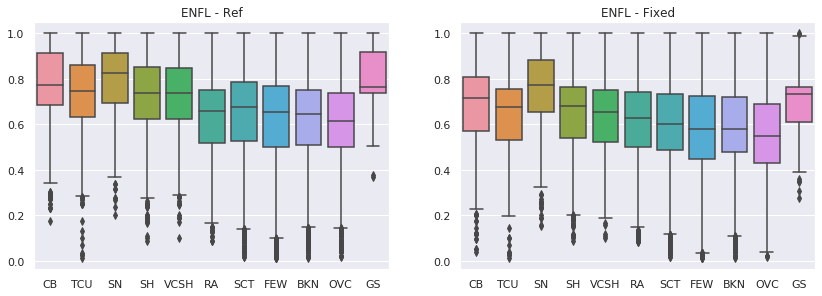

In [27]:
name = "ENHF"
for name in ["ENHF","ENBO","ENBN","ENOL","ENKB","ENFL"]:
    fig=plt.figure(figsize=(14,10))
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222, sharey = ax1)
    sns.boxplot(data=df1[name],ax=ax1)
    sns.boxplot(data=df2[name],ax=ax2)
    for ax in [ax1,ax2]:
        ax.set_xticklabels(observasjon)
    ax1.set_title(f"{name} - Ref")
    ax2.set_title(f"{name} - Fixed")
    fig.savefig(outsource+name+"METAR.pdf", bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

In [8]:
forecast_freq = {}
forecast_freq_fixed = {}

y_treshold = 0.7; o_treshold = 0.9; r_treshold = 0.99
for name in list_of_names:
    forecast_freq[name] = np.zeros(5)
    forecast_freq_fixed[name] = np.zeros(5)
    
for file in htiseason:
    HTI = xr.open_dataset(folder+file)["helicopter_triggered_index"]
        
    for name,Point in zip(list_of_names,list_of_new_geoms):
        freq = forecast_freq[name]
        point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
        for time in point_ds.time.values[4:10]:
            if point_ds.sel(time=time).values < y_treshold:
                freq[0] += 1
            elif point_ds.sel(time=time).values < o_treshold:
                freq[1] += 1
            elif point_ds.sel(time=time).values < r_treshold:
                freq[2] += 1
            else:
                freq[3] += 1
            freq[4] += 1
            
for file in htiseason_fixed:
    HTI = xr.open_dataset(folder+file)["helicopter_triggered_index"]
       
    for name,Point in zip(list_of_names,list_of_new_geoms):
        freq = forecast_freq_fixed[name]
        point_ds = HTI.sel(x=Point.x, y=Point.y,method="nearest")
        for time in point_ds.time.values:
            if point_ds.sel(time=time).values < y_treshold:
                freq[0] += 1
            elif point_ds.sel(time=time).values < o_treshold:
                freq[1] += 1
            elif point_ds.sel(time=time).values < r_treshold:
                freq[2] += 1
            else:
                freq[3] += 1
            freq[4] += 1
            
ds = pd.DataFrame.from_dict(forecast_freq,orient="index",columns = ["White","Yellow","Orange","Red","Total"])
ds_fixed = pd.DataFrame.from_dict(forecast_freq_fixed,orient="index",columns = ["White","Yellow","Orange","Red","Total"])
            
ds_fixed.to_csv("source_disk/results/HTI_fixed.csv")
ds.to_csv("source_disk/results/HTI.csv") 

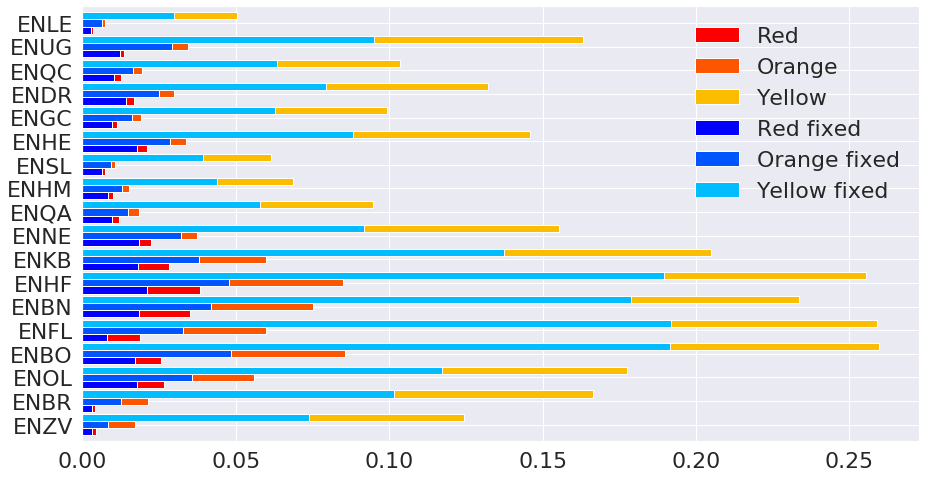

In [10]:
fig,ax =  plt.subplots(figsize = [15,8])
ds = pd.read_csv("source_disk/results/HTI.csv",index_col = 0)
ds_fixed = pd.read_csv("source_disk/results/HTI_fixed.csv",index_col = 0)

for color in ["White","Yellow","Orange","Red","Total"]:
    ds_fixed[color] = ds_fixed[color]/ds_fixed["Total"]
    ds[color] = ds[color]/ds["Total"]
    
ds.plot(kind="barh",width=.9,ax=ax,y = ["Red","Orange","Yellow"],color = [ "#fc0000","#fc5600","#fcbd00"])
ds_fixed.plot(kind="barh",width=.9,ax=ax,y = ["Red","Orange","Yellow"],color = ["#0000fc","#0056fc","#00bdff"])
ax.legend(["Red","Orange","Yellow","Red fixed","Orange fixed","Yellow fixed"],framealpha=0)
fig.savefig(outsource+"fixeffect.pdf", bbox_inches = 'tight', pad_inches = 0.01)

In [110]:
def parse_parsed_METAR(filename):
    ds = pd.read_csv(filename,index_col = 0)
    for i,row in ds.iterrows():
        for i,entry in enumerate(row):
            row[i] = np.array((entry.strip("[]").split()),dtype=int)
    return ds.to_dict(orient="index")

array_dict = parse_parsed_METAR("source_disk/results/METAR.csv")
array_dict_fixed = parse_parsed_METAR("source_disk/results/METAR_fixed.csv")
for name in array_dict:
    for key in array_dict[name]:
        if key == "Total":
            continue
        a = array_dict[name][key][[0,1,2,3,4,5,6,7,8,9,10,11]]
        b = array_dict_fixed[name][key][[0,1,2,3,4,5,6,7,8,9,10,11]]
        a[4] += a[5]
        b[4] += b[5]
        array_dict_fixed[name][key] = b[[0,1,2,3,4,6,7,8,9,10,11]]
        array_dict[name][key] = a[[0,1,2,3,4,6,7,8,9,10,11]]

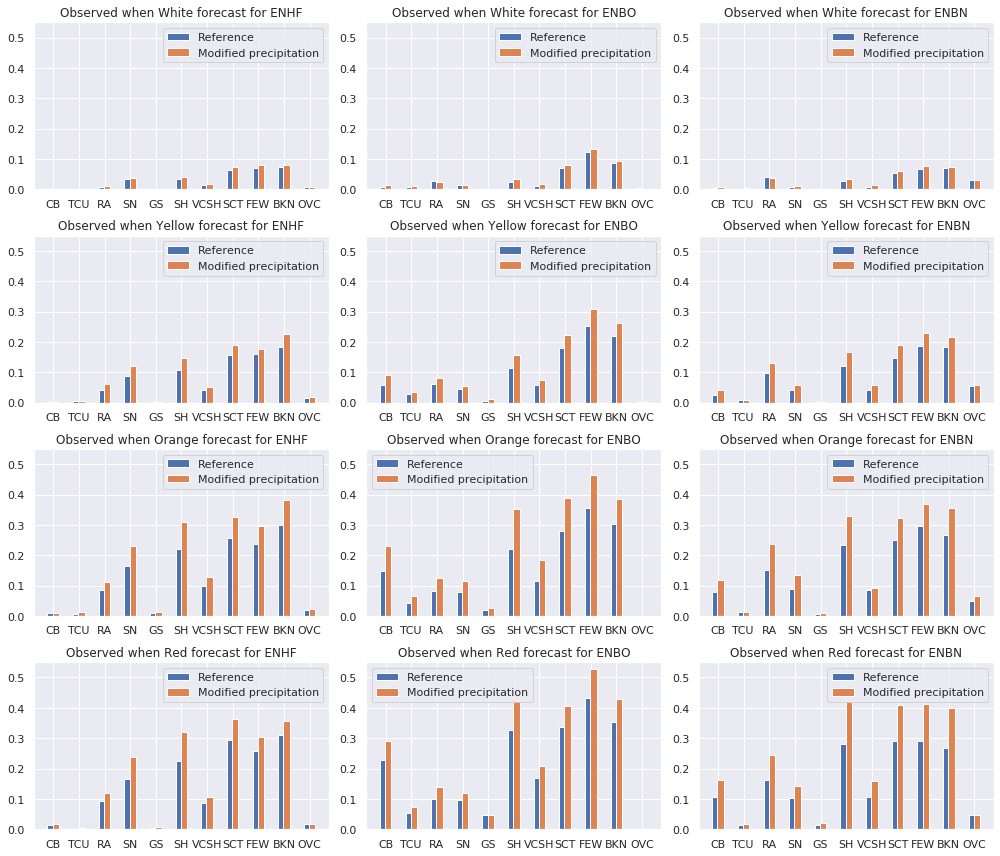

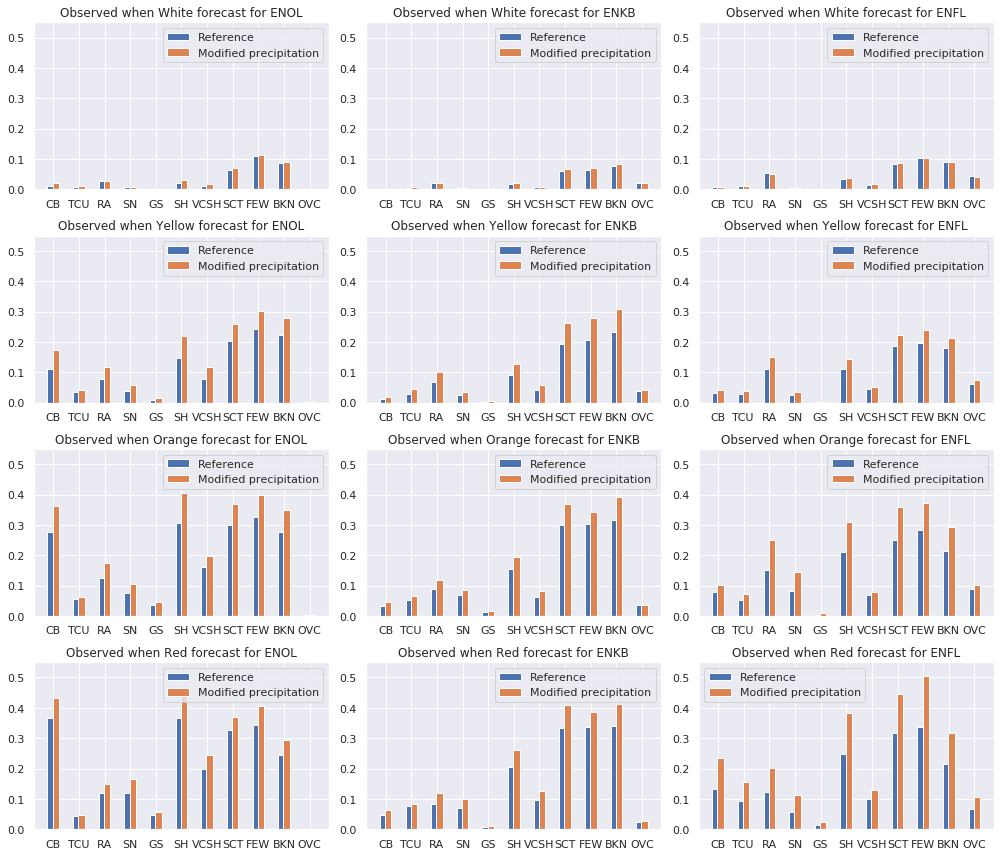

In [111]:
def plot_METAR(ICAO,color,ax):
    lookup = {"White":0,"Yellow":1,"Orange":2,"Red":3}
    ind = lookup[color]
    ds = array_dict[ICAO]
    ds_fix = array_dict_fixed[ICAO]
    ax.bar(np.array(range(11))-0.10,ds[color]/ds["Total"][ind],width = 0.25,label = "Reference")
    ax.bar(np.array(range(11))+0.10,ds_fix[color]/ds_fix["Total"][ind],width = 0.25,label="Modified precipitation")
    ax.set_xticks(range(11))
    ax.set_xticklabels(observasjon[:5]+observasjon[6:])
    ax.set_title(f"Observed when {color} forecast for {ICAO}")
    ax.legend()
    ax.set_ylim(0,0.55)
    
fig,ax = plt.subplots(4,3,figsize = [14,12])
for color in ["White","Yellow","Orange","Red"]:
    lookup = {"White":0,"Yellow":1,"Orange":2,"Red":3}
    ind = lookup[color]
    
    plot_METAR("ENHF",color,ax[ind][0])
    plot_METAR("ENBO",color,ax[ind][1])
    plot_METAR("ENBN",color,ax[ind][2])
    plt.tight_layout()
fig.savefig(outsource + "HTIMetar1.pdf")   

fig,ax = plt.subplots(4,3,figsize = [14,12])

for color in ["White","Yellow","Orange","Red"]:
    lookup = {"White":0,"Yellow":1,"Orange":2,"Red":3}
    ind = lookup[color]

    plot_METAR("ENOL",color,ax[ind][0])
    plot_METAR("ENKB",color,ax[ind][1])
    plot_METAR("ENFL",color,ax[ind][2])
    plt.tight_layout()
fig.savefig(outsource + "HTIMetar2.pdf")

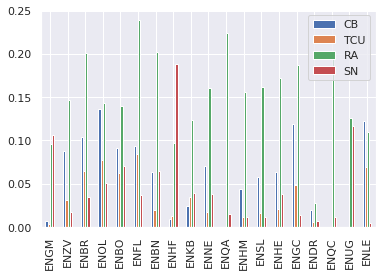

In [122]:
li = {}
l2 = []
for name in METAR_code:
    ds = pd.read_csv(f"source_disk/METAR/{name}.csv",index_col=0,parse_dates=True)
    li[name] = ds.sum()
    l2.append(len(ds))
ds = pd.DataFrame.from_dict(li,orient="index",columns=observasjon)
ds["TOT"] = l2
ds["GS"] = ds["GS"] + ds["GR"]

dp = ds.copy()
dp = dp.drop("TOT",axis=1)
dp = dp.drop("GR",axis=1)
for key in dp:
    dp[key] = (ds[key]/ds["TOT"])
dp.plot(kind = "bar",y=["CB","TCU","RA","SN"])


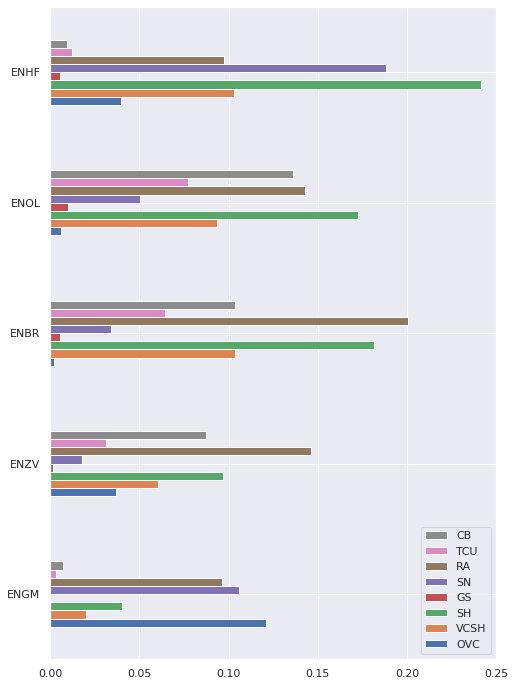

In [128]:
fig,ax = plt.subplots(figsize=(8,12))
dp.iloc[[0,1,2,3,7]].plot(kind="barh",ax=ax,xlim=[0,0.25],y=["OVC","VCSH","SH","GS","SN","RA","TCU","CB"])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels))
fig.savefig(outsource+"METAR_airports.pdf")

In [182]:
for i,key in enumerate(METAR_code):
    print(i,key,len(METAR_code[key]))
    


0 ENZV 172930
1 ENBR 165349
2 ENOL 156912
3 ENBO 167083
4 ENFL 140667
5 ENBN 123517
6 ENHF 112746
7 ENKB 199164
8 ENNE 154368
9 ENQA 157377
10 ENHM 155334
11 ENSL 168329
12 ENHE 191234
13 ENGC 140002
14 ENDR 155756
15 ENQC 156626
16 ENUG 67604
17 ENLE 43847


In [5]:
dt = pd.to_datetime("2016-11-13 22")
ENKB.index[ENKB.index.get_loc(dt, method='nearest')]

Timestamp('2016-11-13 21:50:00')

In [ ]:
def METAR(line):
    AUTO,NCD = 0,0
    place = re.findall(r"(\s[A-Z]+\s)",line)
    wind = re.findall(r"(\d{5}(G\d\d)?KT?)",line)
    sight = re.findall(r"(\s\d{4}(NDV)?\s)",line)
    cloud = re.findall(r"(\s(SCT)?(FEW)?(BKN)?(OVC)?/*\d{3}\s)",line)
    temp = re.findall(r"(\sM?\d+/M?\d+\s)",line)
    
    #PLACE
    if len(place) == 1:
        # NO AUTO or NCD
        place = place[0].strip()
    
    else:
        if " AUTO " in place:
            AUTO = 1
        if " NCD " in place:
            NCD = 1
        place = place[0].strip()
        
    #WIND STRENGTH

    if len(wind) == 0:
        # VRB
        wind = re.findall(r"VRB\d\dKT",line)[0][3:5]
        
    elif len(wind[0]) == 1:
        wind = wind[0][3:-2].strip()
    
    else:
        # GUST
        wind = wind[0][0][3:5]  
    
    # Sight
    if len(sight) == 0:
        # If no 9999[NDV] then probably CAVOK
        sight = "9999"
        cloudheight = "-1"
        
    if len(sight[0]) > 1 and sight[0][1] == "":
        sight = sight[0][0]
    
    # Cloud height and type.
    if len(cloud) > 0:
        cloud = cloud[0]

        cloudheight = cloud[0][-3:]
        for i,ct in enumerate(["SCT","FEW","BKN","OVC"]):
            if ct == cloud[i+1]:
                cloudtype = ct
                break
    
    # TEMP
    
    T,TD = temp[0].split("/");    T = T.strip();    TD = TD.strip()
    if T[0] == "M":
        T = -int(T[1:])
    else:
        T = int(T)
        
    if TD[0] == "M":
        TD = -int(TD[1:])
    else:
        TD = int(TD)
        
    #FIX AUTOSIGHT (NDV) and AUTOHEIGHT (NCD)
    if AUTO:
        sight = sight[0][0][:5]
        if NCD:
            cloudheight = "-1"
    
    if cloudheight == "-1":
        cloudtype = ""

    return place,int(wind),int(sight),int(cloudheight),cloudtype,T,TD,AUTO

    
METAR("2008-01-01T01:50:00   ENOL 010150Z 11026G37KT CAVOK 00/M06 Q1032 =")        
METAR("2008-01-01T01:20:00   ENKB 010120Z AUTO 11008KT 080V150 9999NDV NCD M00/M07 Q1030=")
METAR("2008-01-01T00:20:00   ENHE 010020Z 15026KT 9999 SCT025 05/01 Q1029=")